# Emotion Classification in Text

The objective of this project is to develop machine learning models to classify emotions in text samples. Dataset used for classification can be downloaded from : https://drive.google.com/file/d/1HWczIICsMpaL8EJyu48ZvRFcXx3_pcnb/view?usp=drive_link

# Importing General Libraries 📥

In [1]:
# installing NLTK for NLP
#pip install nltk

In [2]:
# downloading NLTK modules

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
# libraries for EDA and visualization
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Importing Dataset 📥 

In [5]:
# loading dataset
df=pd.read_csv('nlp_dataset.csv')

In [6]:
# header rows
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [7]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


> ### The dataset contains feature '**Comment**' which is text data and target '**Emotion**' indicating the emotion expressed in text.

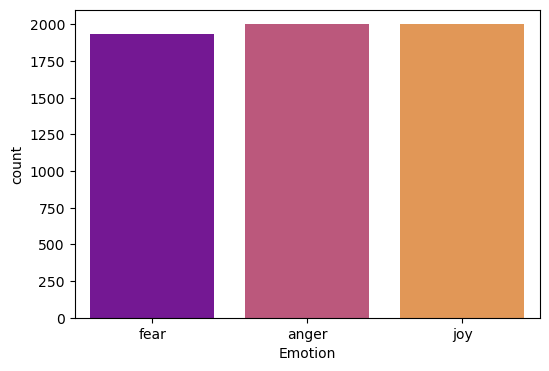

In [8]:
# plotting entries for each emotion
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Emotion', hue='Emotion', palette='plasma')
plt.show()

In [9]:
# value count
df.Emotion.value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

> ### The given dataset only has 3 classes of emotions: anger, joy and fear

# Data Preprocessing 🔁

 **we will perform the following steps for preprocessing data:**
- `Text Cleaning`: *remove special characters, punctuation, and convert all text to lowercase*         
- `Tokenization`: *split the text into individual words or tokens*            
- `Stopword Removal`: *remove common words like "the", "and", etc. that are irrelevant in determining the sentiment*          
- `Lemmatization`: *reduce words to their base form, known as the lemma* <br><br>              
**Note: Preprocessing steps remove irrelevant tokens in the context of emotion detection or classification.**

In [10]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

#porter = PorterStemmer() #Creates an instance of the PorterStemmer class
wordnet = WordNetLemmatizer() #Creates an instance of the WordNetLemmatizer class

# function for comment cleaning and preprocessing
def preprocess_comment(comment):
    comment = comment.lower() #converting comment to lowercase
    comment = re.sub(r'[^a-zA-Z]', ' ', comment) #substituting any characters other than alphabets with ' '
    tokens = word_tokenize(comment) #tokenizing comments
    stop_words = set(stopwords.words('english') + ['im', 'ive', 'also']) #adding specific tokens to stop words
    tokens = [t for t in tokens if t not in stop_words] #removing stopwords
    #tokens = [porter.stem(t) for t in tokens] #stemming tokens
    tokens = [wordnet.lemmatize(t) for t in tokens] #lemmatizing tokens
    return ' '.join(tokens) #returning cleaned comment

> ### I added *'im'*, *'ive'*, and *'also'* to the stopwords list because they frequently appeared at the beginning of comments after removing the default stopwords, and they were irrelevant.

In [11]:
# comment preprocessing
df['Cleaned_Comment']=df['Comment'].apply(preprocess_comment)

In [12]:
# inspecting random rows
df.sample(10)

,Comment,Emotion,Cleaned_Comment
178,i always notice even though she is fabulous at...,fear,always notice even though fabulous hiding acco...
1235,i love that its adoption of a teenager which m...,fear,love adoption teenager many people feel afraid...
3319,i feel shaken open as though my heart were bro...,fear,feel shaken open though heart broken word speak
4140,i guess a similar viewpoint might be when we f...,joy,guess similar viewpoint might feel smug better...
866,i want to find my essence and my substance and...,fear,want find essence substance feel scared empty ...
4476,i love the feeling of running in the cold when...,anger,love feeling running cold see breath cold air ...
1048,i don t understand why musicians sometimes fee...,fear,understand musician sometimes feel inhibited
40,i looked at what had happened to us in two gen...,anger,looked happened u two generation looked happen...
1532,i feel like i should have some wine or somethi...,joy,feel like wine something amused
1586,i think i can finally articulate it the prius ...,joy,think finally articulate prius shiny happy al ...


> ### Stemming produced incorrect results, so it was skipped, while the lemmatizer did not appear to make any significant changes

In [13]:
#df.to_csv('cleaned.csv')

<br>

#  Feature Extraction ✨

We'll use `TfidfVectorizer` from the `sklearn library` to transform the text data into numerical features. The TfidfVectorizer uses the Term Frequency-Inverse Document Frequency (TF-IDF) technique to weight the importance of each word in the text data (`TF-IDF= TF * IDF`).  TF-IDF method not only considers the frequency of words in each document but also how unique they are to the entire dataset. This helps to reduce the dimensionality of the feature space and improve model performance.

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Cleaned_Comment']) # features
Y = df['Emotion'] # target

In [15]:
# vocabulary list
tfidf_vectorizer.get_feature_names_out()

array(['aa', 'aac', 'aaron', ..., 'zonisamide', 'zq', 'zumba'],
      dtype=object)

In [16]:
# TF-IDF matrix
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<br>

# Model Development ⚙️

We will implement two machine learning models: `Naive Bayes` and `Support Vector Machine` to classify comments

In [17]:
#splitting train-test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### a. Naive Bayes

Naive Bayes is a probabilistic classifier based on Baye's theorem. It assumes that features are independent of each other, which is often not true in real-world scenarios, but the model can still perform well in practice. For text classification, it calculates the probability of each class (emotion) given the TF-IDF vectors for input features (tokens), and select the emotion class with the highest posterior probability as the predicted class.

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, Y_train)
nb_predictions = nb_model.predict(X_test)

### b. Support Vector Machine

SVM is a powerful algorithm that finds the hyperplane that best separates different classes in the feature space. For multi-class problems like emotion classification, the model construct a hyperplane in the feature space that maximally separates the emotion classesbased on the TF-IDF vectors, and  classify new instances by determining which side of the hyperplane they fall on.

In [19]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(dual='auto')
svm_model.fit(X_train, Y_train)
svm_predictions = svm_model.predict(X_test)

<br>

# Model Comparison 📈

In [20]:
from sklearn.metrics import accuracy_score, f1_score

# Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(Y_test, nb_predictions))
print("Naive Bayes F1-score:", f1_score(Y_test, nb_predictions, average='macro'))

print()

# Support Vector Machine model
print("SVM Accuracy:", accuracy_score(Y_test, svm_predictions))
print("SVM F1-score:", f1_score(Y_test, svm_predictions, average='macro'))

Naive Bayes Accuracy: 0.8947811447811448
Naive Bayes F1-score: 0.8947965130153684

SVM Accuracy: 0.9377104377104377
SVM F1-score: 0.9374968770484271


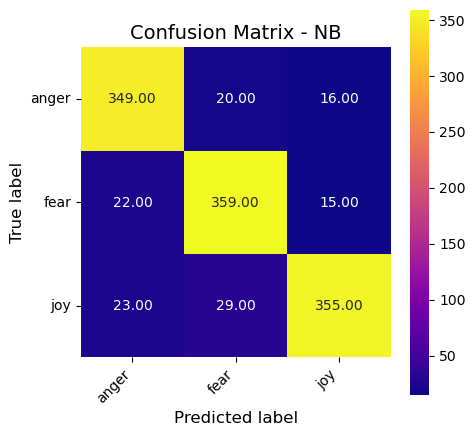

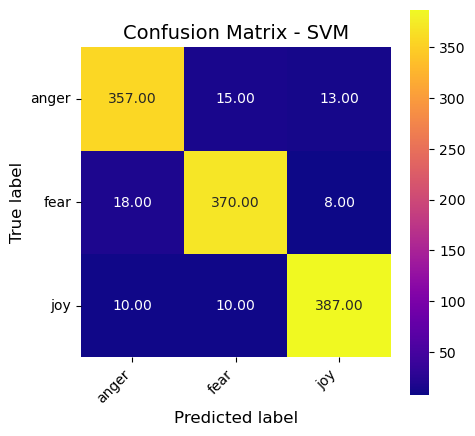

In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='plasma', square=True, ax=ax)
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_title(f'Confusion Matrix - {model_name}', fontsize=14)
    ax.set_xticklabels(classes, rotation=45, ha='right')
    ax.set_yticklabels(classes, rotation=0)
    plt.show()

classes = ['anger','fear','joy']  # 
plot_confusion_matrix(Y_test, nb_predictions, classes, 'NB')
plot_confusion_matrix(Y_test, svm_predictions, classes, 'SVM')

>  **SVM model** showed significantly higher overall accuracy, indicating it correctly classified a larger proportion of the test samples. This might be because SVMs are particularly effective in high-dimensional spaces, which is the characteristic of text data after vectorization (TF-IDF). Unlike Naive Bayes, SVM doesn't assume feature independence, which might be more realistic for text data where word occurrences are often related.

In [22]:
Y_test.value_counts()

Emotion
joy      407
fear     396
anger    385
Name: count, dtype: int64